### Kyle Wilbert
### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is the condition - congruent or incongruent. The dependent variable is the time for each response.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$
H_{0}: \mu_{congruent} - \mu_{incongruent} \geq 0 \\
H_{1}: \mu_{congruent} - \mu_{incongruent} < 0 \\
$$
- $\mu$ values are population mean times for each response condition
- The null hypothesis ($H_0$) proposes that the difference of the mean population response times is not significant between the congruent and incongruent conditions. Whereas the alternative hypotheses ($H_1$) proposes that the difference of mean population response times is significant between the congruent and incongruent conditions.
- given the directional nature of the hypothesis, I will use a two-sided T-test

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('stroopdata.csv')

df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


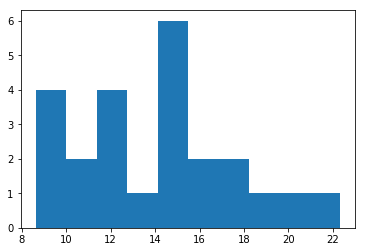

In [2]:
plt.hist(df["Congruent"]);

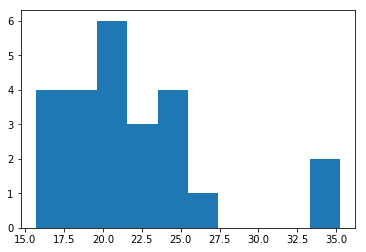

In [3]:
plt.hist(df['Incongruent']);

In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [5]:
# difference of means of population
mean_diff = df['Congruent'].mean() - df['Incongruent'].mean()
mean_diff

-7.9647916666666667

**Since the sample sizes are small here, the histograms don't show a normal distribution. As a result, it is more beneficial to look at the 5-figure summaries for each (rather than the mean and standard deviation), which the describe() function lays out nicely.**

**The Incongruent set has a median of 14.356500 and an IQR of 5.33475. The Congruent set has a median of 21.017500 and an IQR of 4.3055. We can say that the Congruent set has less spread than the Incongruent set. And looking at the histogram, we can also see a few outliers toward the right, which skews the distribution positively.**

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

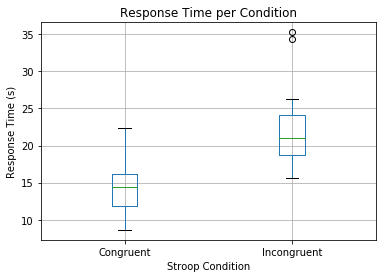

In [6]:
# plot boxplots for Congruent and Incongruent conditions
plt.xlabel('Stroop Condition')
plt.ylabel('Response Time (s)')
plt.title('Response Time per Condition')
boxplot = df.boxplot(column=['Congruent','Incongruent'])
plt.show();

**The IQR for the congruent condition is smaller than that of the incongruent condition - there is slightly more variability with the incongruent condition. Also, the presence of two outliers in the incongruent condition skews the distribution positively. Finally, judging by the respective medians, response times under the congruent condition appear to be faster (and somewhat more consistently so) than response times under the incongruent condition.**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
# run T-test
stats.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [8]:
# bootstrapping to construct confidence intervals
diffs = []

for _ in range(10000):
    bootsample = df.sample(200, replace=True)
    mean_congruent = bootsample['Congruent'].mean()
    mean_incongruent = bootsample['Incongruent'].mean()
    diffs.append(mean_congruent - mean_incongruent)

In [9]:
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5) # calculate 95% confidence interval of sample

(-8.6348717500000003, -7.3208436250000011)

- t-stat is -8.0207
- p-value is near 0
- confidence interval of sample is (-8.6349, -7.3208)

- The t-stat falls within the confidence interval, indicating that we should reject the null hypothesis. 
- The p-value is nearly zero (compared to our $\alpha$ of 0.05) which tells us that it is incredibly unlikely that our null hypothesis is true.
- Conclusion: We reject the null hypothesis.

**The results indicates that those participants in the incongruent condition took significantly longer to respond than those in the congruent condition. These results match up with my own experience and expectation that the Stroop effect is present and does handicap one's ability to respond, increasing the time it takes to respond.**


(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**In educated adults, reading is a highly-trained, automatic process; as a result, it doesn't require too much focused attention, especially for a task as simple as reading a word. Describing a physical characteristic of a word, like its color, is less automatic. To complete the task (naming the color rather than reading the word) requires interrupting the automatic process which leads to the longer response time.**

**I think a similar task using sounds would show the same results. The experimenter would show the name of a sound, but the subject would need to identify the sound rather than the word. I think you would see a similar effect between the congruent and incongruent conditions.**

#### Sources

Brownlee, Jason. “Critical Values for Statistical Hypothesis Testing and How to Calculate Them in Python.” https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/, 11 June 2018. Web. 10 Nov. 2018.

Cherry, Kendra. “The Stroop Effect: Naming the Color but Not the Word.” https://www.verywellmind.com/what-is-the-stroop-effect-2795832, 10 Jan. 2018. Web. 11 Nov. 2018.

